# Investigating LSE Department's digital presence on Twitter

### Part 1: Introduction

This project aims to find out whether LSE departments should use Twitter to communicate with LSE students. During COVID-19, most events moved online, and most organisations had to improve their digital presence to adapt. Despite activities slowly returning to normal, having an online presence is still extremely important. Therefore, exploring whether Twitter is an effective social media platform to use to improve the department's digital presence is a topic worth exploring.

We can explore the statement above by carrying out an analysis similar to social media analytics. To find out whether Twitter is an adequate social media platform, we may want to answer these few questions:
1. What defines a successful Twitter account?
2. Does Twitter have an active audience that's worth maintaining?
3. Is it easy to grow on Twitter? Do tweets often get shared enough to encourage growth of a Twitter account?
4. Does a department need positive attention to be successful? Or can negative attention make the account successful too?

### Part 2: Data Collection

To answer the questions above, we have to collect variations of information for each department. For example, we could gather information like the number of followers, types, numbers of engagements, and the sentiments of replies and mentions for each account. Using different combinations of information, we can find out whether Twitter is an adequate social media platform. The relevant code for data collection can be found in the data collection Jupyter notebook.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
dept_eng = pd.read_csv('data/dept_eng.csv', index_col = 0)
mentions = pd.read_csv('data/mentions.csv', index_col = 0)
tweets_stats = pd.read_csv('data/tweets_stats.csv', index_col = 0)

Now, the data collection section is complete. In the data analysis, I'll be using all the datasets created. Here is the list of relevant datasets for easier tracking:
1. **dept_eng** represents an aggregate of each department's engagement statistics and includes the following headers:
    * Department name
    * Retweet count total
    * Reply count total
    * Like count total
    * Quote count total
    * Follower count
    * Tweet counts total
    * Total engagement
    * Engagement ratio
    * Positive mentions total
    * Neutral mentions total
    * Negative mentions total
    
    
2. **mentions** contains the last 100 mentions of each department and includes the following headers:
    * User ID of the person who retweeted
    * Department
    * Tweet content
    * Subjectivity score of the tweet
    * Polarity score of the tweet
    * Sentiment of the tweet
    
    
3. **tweets_stats** contains engagement information of 100 the last 100 tweets of each department and includes the following headers:
    * Tweet number from 0 -99
    * Department
    * Retweet count for the individual tweet
    * Reply count for the individual tweet
    * Like count for the individual tweet
    * Quote count for the individual tweet
   
   
Now that we've defined our datasets, we can move on to the data analysis.

### Part 3: Data Visualisation

After a quick scan of the datasets, these are some graphs that I could draw to decide whether Twitter is an effective social media platform:
* Departments and their retweet count 
* Departments and their like count 
* Changes in engagements of tweets 
* Overall following count vs follower to engagement ratios 
* Total comments and ratio of comment sentiments
* Network graph of the users who have mentioned the department's accounts

Before visualising the data, we can see if we can quickly explore the data. The dept_eng dataset has the central sets of information we want to use.

In [4]:
dept_eng.describe()

Retweet count  Reply count  Like count  Quote count  Follower count  \
count      23.000000    23.000000   23.000000    23.000000       23.000000   
mean      418.826087     8.826087  249.173913    10.695652    12261.304348   
std       240.352516    11.247837  172.878479     7.766096     9382.887244   
min        64.000000     0.000000    4.000000     0.000000     1741.000000   
25%       276.000000     3.500000  118.000000     4.000000     4292.500000   
50%       386.000000     6.000000  230.000000     9.000000     8515.000000   
75%       571.500000    10.000000  370.000000    16.500000    17994.000000   
max      1128.000000    54.000000  738.000000    31.000000    35783.000000   

        Tweet count  Total engagement  Engagement ratio  Positive mentions  \
count     23.000000         23.000000         23.000000          23.000000   
mean    4756.695652        687.521739          0.100031          52.826087   
std     3515.402220        357.841619          0.099966           8.216680   
min      495.000000        170.000000          0.018563          35.000000   
25%     1761.000000        447.000000          0.036337          50.500000   
50%     3996.000000        625.000000          0.062595          53.000000   
75%     6768.000000        854.500000          0.131488          56.000000   
max    13355.000000       1560.000000          0.385985          71.000000   

       Neutral mentions  Negative mentions  
count         23.000000          23.000000  
mean          41.521739           5.652174  
std            7.680374           3.625775  
min           28.000000           1.000000  
25%           38.000000           2.500000  
50%           42.000000           6.000000  
75%           44.000000           8.000000  
max           61.000000          16.000000

Using the description statistics above, we can see the average number of engagements and should expect the plots to fit this average. 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Visualisation 1: Exploring the engagements of each department's account

To start, we can compare the department's following counts.

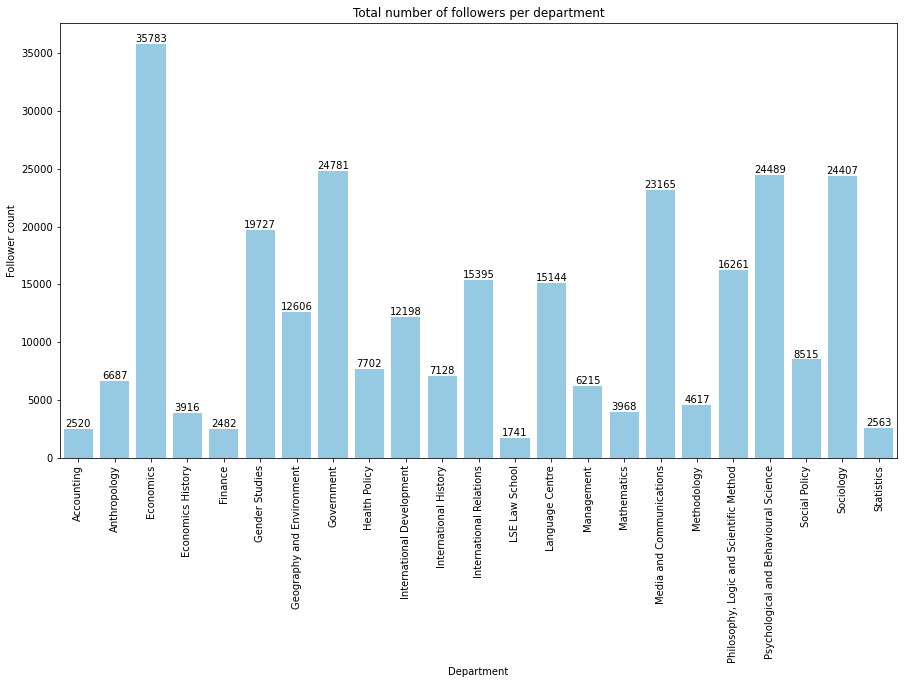

In [6]:
#Plotting the follower counts of each department
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Department', y = 'Follower count' , data =  dept_eng, color = '#89CFF0')
ax.bar_label(ax.containers[0])
ax.set_title('Total number of followers per department')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

The Economics department has the most followers, which we would expect, since they're the largest department at the LSE. Following the Economics department, the Psychology, Sociology, Government, and Media department follows closely. The Accounting, Economics History, Finance, Law, Mathematics and Statistics departments have the lowest following count. Again, we would expect this as these departments are relatively tinier. However, the only strange follower count is LSE Law School. It's particular strange when look at the size of the department.

Next, we can look at the engagement ratios to determine whether a high follower count necessarily means that a department is popular.

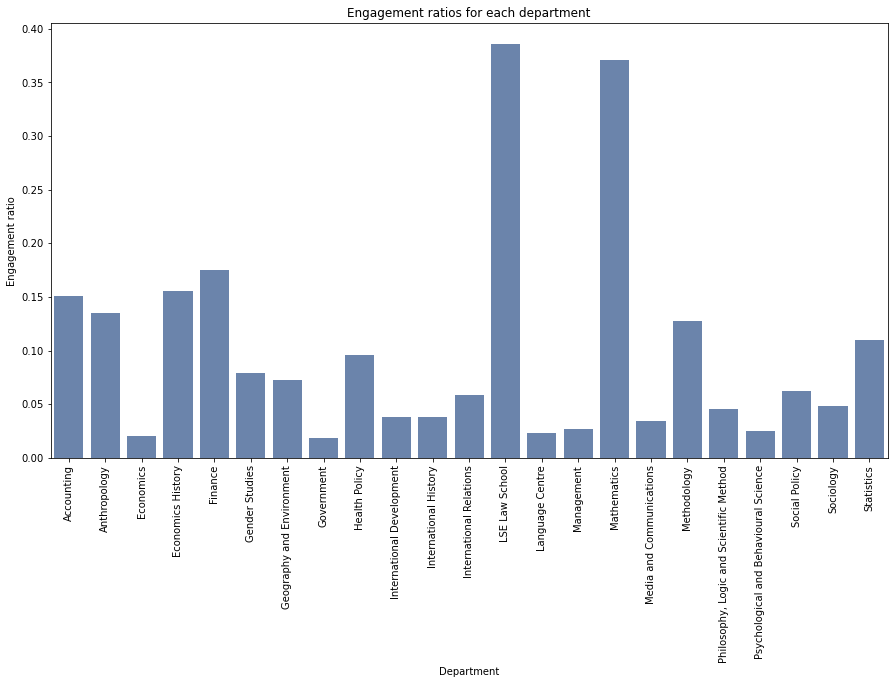

In [7]:
#Plotting the engagement ratios
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Department', y = 'Engagement ratio' , data =  dept_eng, color = '#6082B6')
ax.set_title('Engagement ratios for each department')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

Looking at the second plot of the engagement ratios, we can observe a pattern. For starters, departments with tinier following counts have higher engagement rates. For example, the LSE Law School and Mathematics department had the highest engagement ratio, whereas the Economics department had a low engagement ratio despite its follower count. 

This observation could indicate that users are more interactive with departments with small accounts. It also tells us that a higher following count doesn't necessarily mean that the account is popular. Some other explanations for the observations above may include:
* Smaller departments have a tighter sense of community
* It is harder to maintain engagement with a large following
* Larger department accounts may have many ghost followers

However, if we're looking at engagement ratios on a bigger scale, they range from 0.01 to 0.4. None of the departments has an engagement ratio above 0.5. If we compare this value to general social media analytics, the engagement rates for each department is high. The average is usually around 0.01 to 0.035.

#### Visualisation 2: Investigating engagements on a deeper level

We found that engagement ratios tell us more about an account's activity in comparison to the follower count. A good step forward would be to investigate types and numbers of engagement and sentiments each department receives. This further analysis could reveal a lot of information about what users expect from the department's Twitter accounts.

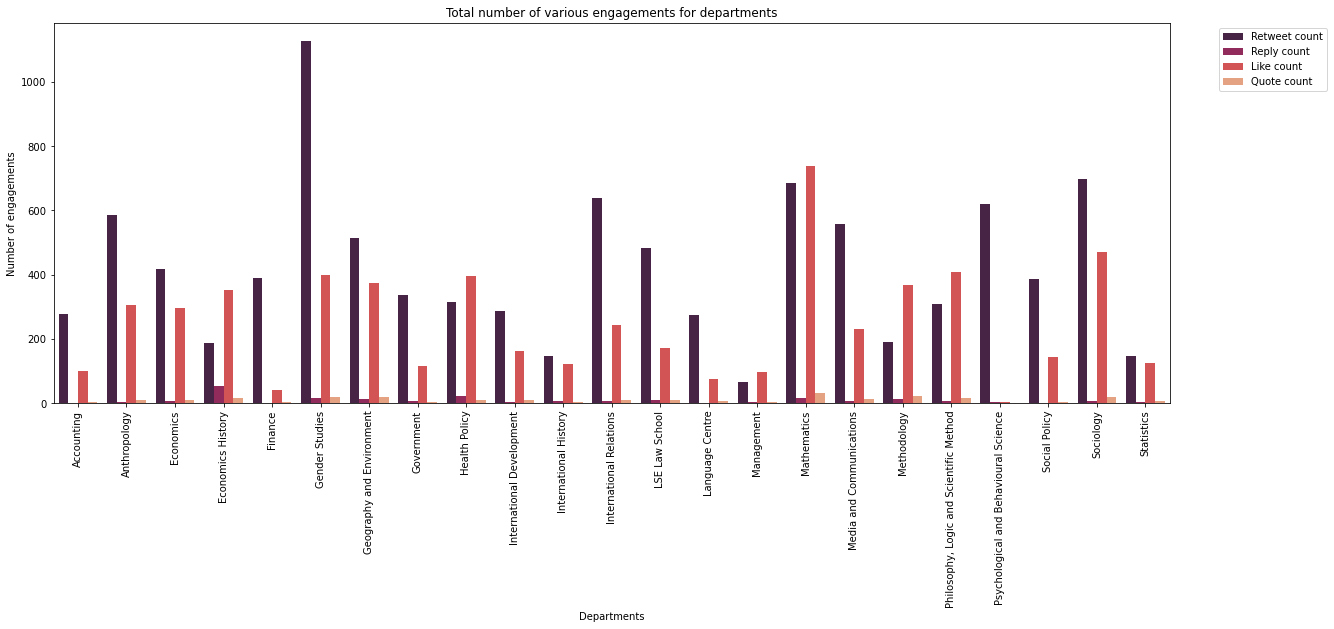

In [8]:
plt.figure(3,figsize=(20,7))
tweets_df_long = pd.melt(dept_eng.iloc[:,0:5].reset_index(), id_vars = 'Department', value_vars = dept_eng.iloc[:,1:5].columns,
       var_name = 'Engagement types', value_name = 'percentage')
sns.barplot(data = tweets_df_long, x = 'Department', y = 'percentage', hue = 'Engagement types', 
            palette = 'rocket')
plt.title('Total number of various engagements for departments')
plt.xlabel('Departments')
plt.ylabel('Number of engagements')
plt.legend(bbox_to_anchor= (1.04,1), loc = 'upper left')
plt.xticks(rotation = 90);

The bar chart above tells us that most engagement on the LSE department's accounts came from retweets. But let's look at the patterns of all types of engagements for each individual tweet to see if there is anything worth noting.

In [9]:
import plotly.express as px
px.line(tweets_stats, x = 'Tweet no', y = 'Retweet count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Retweet frequencies for department tweets')

In [10]:
px.line(tweets_stats, x = 'Tweet no', y = 'Reply count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Reply frequencies for department tweets')

In [11]:
px.line(tweets_stats, x = 'Tweet no', y = 'Like count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Like frequencies for department tweets')

In [12]:
px.line(tweets_stats, x = 'Tweet no', y = 'Quote count', hover_name = 'Department', 
        color = 'Department', width = 1000, height = 500,
       title = 'Quote frequencies for department tweets')

Overall, for all department accounts, the highest form of engagement is retweets, followed by likes, and lastly, both replies and quotes. It is an unusual observation because for social media, the highest number of engagements are usually likes. Additionally, the plots also show that the replies on tweets are relatively constant, while the likes and quotes on the department's account can vary between large ranges.

Since retweets are the highest form of engagement for all the accounts, this indicates that content on Twitter is often shared, and posts can easily be circulated to multiple users.

#### Visualisation 3: Investigating engagement sentiments
Next, we can look at the sentiments of mentions. Mentions of an account are the most interactive form of engagement on Twitter so it would be interesting to find out whether popular accounts are receiving positive, neutral, or negative mentions from the public.

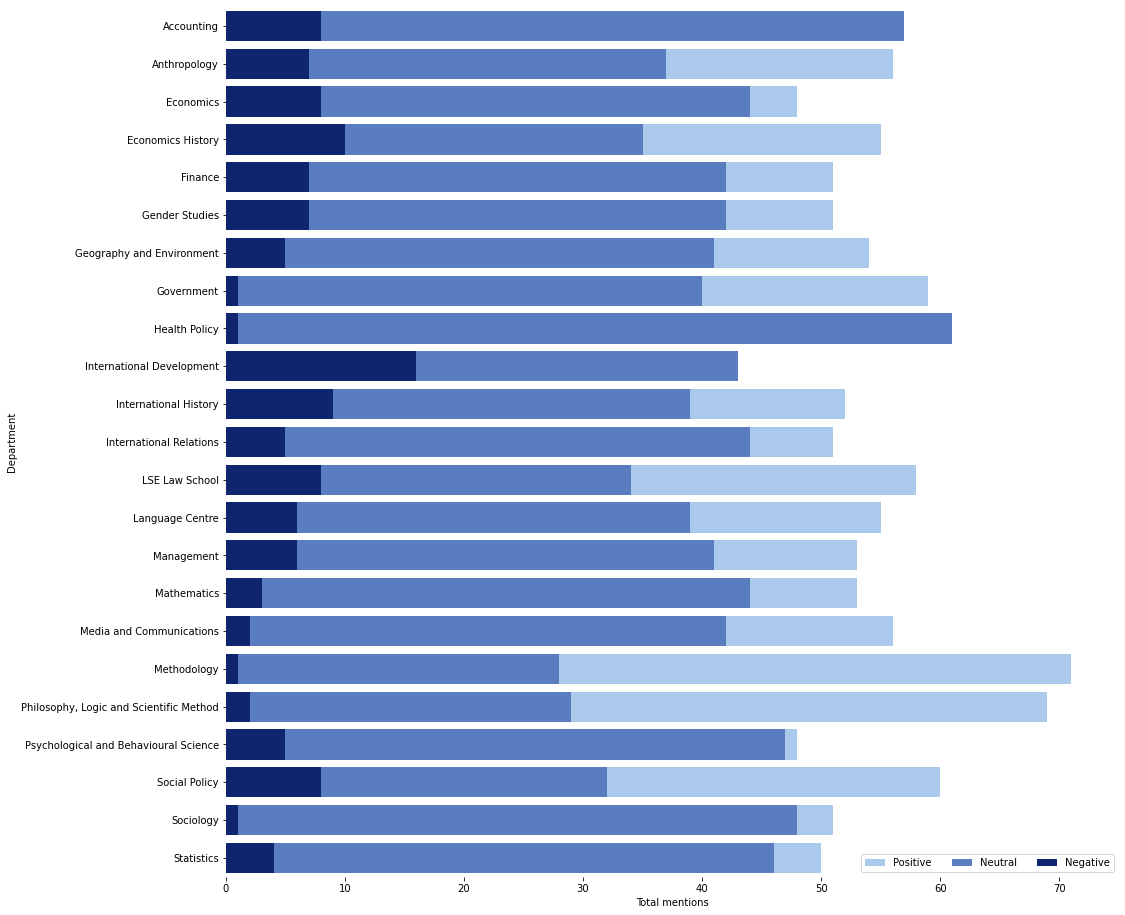

In [13]:
#Sentiments of mentions
f, ax = plt.subplots(figsize=(16, 16))

sns.set_color_codes('pastel')
sns.barplot(x = 'Positive mentions', y = 'Department', data = dept_eng,
            label = 'Positive', color = 'b')

sns.set_color_codes('muted')
sns.barplot(x = 'Neutral mentions', y = 'Department', data = dept_eng,
           label = 'Neutral', color = 'b')

sns.set_color_codes('dark')
sns.barplot(x = 'Negative mentions', y = 'Department', data = dept_eng,
           label = 'Negative', color = 'b')

ax.legend(ncol = 3, loc = 'lower right', frameon = True)
ax.set(xlim = (0, 75), ylabel = 'Department', xlabel = 'Total mentions')
sns.despine(left = True, bottom = True)

Based on the stacked bar plots, most departments have a generally high number of positive mentions, followed by neutral and negative mentions. It is worth noting that the Philosophy, International Development and Economics History departments have the most negative mentions. 

We also have to check these sentiments against the subjectivity of the tweet to complete this section. For instance, if a tweet is negatively classified, but has a high subjectivity score, this tweet could have been classified differently depending on who's reading it.

In [14]:
px.scatter(mentions.iloc[:,[1,3,4]], x = 'Subjectivity', y = 'Polarity', 
           hover_name = 'Department', color = 'Department', width = 1000, height = 500, 
           title = 'Polarity to subjectivity for department tweets')

The scatterplot above shows some distinct pattern. The pattern shows that tweets with a higher subjectivity have a higher polarity score. However, tweets with a lower subjectivity score tend to have a polarity score closer to 0. This observation tells us that the tweets labelled positive were more opinionated. 

To conclude, even though most departments have positive tweets, we should also remember that positively classified tweets are classified this way because of the opinions in the tweet.

#### Visualisation 4: Investigating department categories
After some of the analysis above, I found it quite challenging to identify specific patterns for all 23 departments. So now, I'm looking into the possibility of classifying the departments under categories. After splitting the departments into categories, the analysis might give more interpretative results.

For the categories, we can split the departments into two classes. The two classes can be quantitative and qualitative departments. 

I'm hoping that splitting the departments into two categories can show specific patterns in the categories separately.

In [15]:
dept_categories = dept_eng

def cat(text):
    if text == 'Accounting':
        return 'Quantitative'
    elif text == 'Finance':
        return 'Quantitative'
    elif text == 'Mathematics':
        return 'Quantitative'
    elif text == 'Methodology':
        return 'Quantitative'
    elif text == 'Statistics':
        return 'Quantitative'
    else:
        return 'Qualitative'

In [16]:
dept_categories['Category'] = dept_categories['Department'].apply(cat)
dept_categories

Department  Retweet count  Reply count  \
0                                Accounting            277            1   
1                              Anthropology            586            3   
2                                 Economics            417            7   
3                         Economics History            187           54   
4                                   Finance            390            1   
5                            Gender Studies           1128           15   
6                 Geography and Environment            514           12   
7                                Government            335            5   
8                             Health Policy            313           21   
9                 International Development            286            4   
10                    International History            148            6   
11                  International Relations            639            7   
12                           LSE Law School            484            8   
13                          Language Centre            275            0   
14                               Management             64            4   
15                              Mathematics            686           16   
16                 Media and Communications            557            7   
17                              Methodology            189           14   
18  Philosophy, Logic and Scientific Method            309            6   
19    Psychological and Behavioural Science            619            2   
20                            Social Policy            386            1   
21                                Sociology            697            5   
22                               Statistics            147            4   

    Like count  Quote count  Follower count  Tweet count  Total engagement  \
0           99            3            2520          495               380   
1          306            9            6687          918               904   
2          297           11           35783        10194               732   
3          351           17            3916         1765               609   
4           40            3            2482          605               434   
5          398           19           19727         7243              1560   
6          374           19           12606         5339               919   
7          116            4           24781         8673               460   
8          396           10            7702         4559               740   
9          163            8           12198         5753               461   
10         120            2            7128         7602               276   
11         244           11           15395         3996               901   
12         172            8            1741          645               672   
13          74            6           15144         9755               355   
14          98            4            6215         6293               170   
15         738           31            3968         3782              1471   
16         230           14           23165        13355               808   
17         366           21            4617         1757               590   
18         408           16           16261         3505               739   
19           4            0           24489         1249               625   
20         142            4            8515         2947               533   
21         471           20           24407         6254              1193   
22         124            6            2563         2720               281   

    Engagement ratio  Positive mentions  Neutral mentions  Negative mentions  \
0           0.150794                 35                57                  8   
1           0.135188                 56                37                  7   
2           0.020457                 48                44                  8   
3           0.155516                 55

In [17]:
dept_cats = dept_categories.groupby('Category', as_index = False).sum()
dept_cats

Category  Retweet count  Reply count  Like count  Quote count  \
0   Qualitative           7944          167        4364          182   
1  Quantitative           1689           36        1367           64   

   Follower count  Tweet count  Total engagement  Engagement ratio  \
0          265860       100045             12657          1.366925   
1           16150         9359              3156          0.933794   

   Positive mentions  Neutral mentions  Negative mentions  
0                955               738                107  
1                260               217                 23

The table shows the data respectively for quantitative and qualitative departments. There is a disparity in the numbers because there are more qualitative than quantitative  departments at the LSE. Looking at the averages may be a better way to go.

In [18]:
dept_cats_avg = dept_categories.groupby('Category', as_index = False).mean()
dept_cats_avg

Category  Retweet count  Reply count  Like count  Quote count  \
0   Qualitative     441.333333     9.277778  242.444444    10.111111   
1  Quantitative     337.800000     7.200000  273.400000    12.800000   

   Follower count  Tweet count  Total engagement  Engagement ratio  \
0         14770.0  5558.055556        703.166667          0.075940   
1          3230.0  1871.800000        631.200000          0.186759   

   Positive mentions  Neutral mentions  Negative mentions  
0          53.055556              41.0           5.944444  
1          52.000000              43.4           4.600000

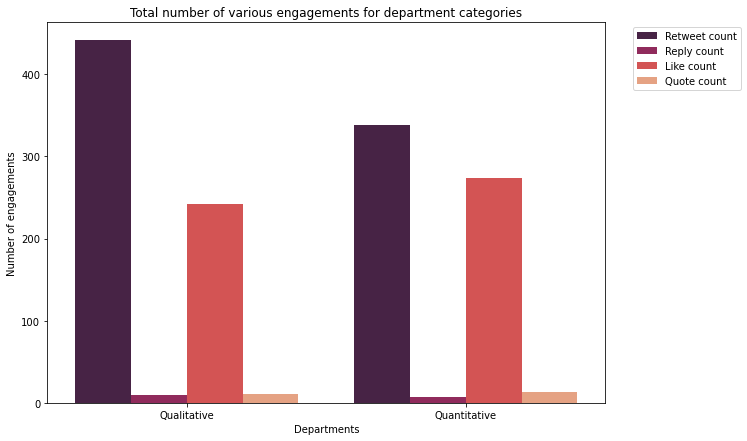

In [19]:
plt.figure(3,figsize=(10,7))
cat_df_long = pd.melt(dept_cats_avg.iloc[:,0:5].reset_index(), id_vars = 'Category', value_vars = dept_eng.iloc[:,1:5].columns,
       var_name = 'Engagement types', value_name = 'percentage')
sns.barplot(data = cat_df_long, x = 'Category', y = 'percentage', hue = 'Engagement types', 
            palette = 'rocket')
plt.title('Total number of various engagements for department categories')
plt.xlabel('Departments')
plt.ylabel('Number of engagements')
plt.legend(bbox_to_anchor= (1.04,1), loc = 'upper left');

We find that, on average, qualitative departments have higher retweets and replies, but quantitative departments have a higher number of likes and quotes per tweet. And similar to the observations earlier, the quantitative departments have fewer follows but a higher engagement ratio. There isn't a significant difference between the categories of departments.

#### Visualisation 5: Identifying the patterns of the users that actively interact with each department's accounts
Now that we've analysed all the data above, we can attempt to find out whether the users who often mention the department have a relationship with other departments. We can start visualising this using a NetworkX graph.

In [20]:
#NetworkX graph of users who mention departments
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()

In [21]:
for i in range(0, len(mentions)):
    g.add_edge(mentions['User ID'][i], mentions['Department'][i])

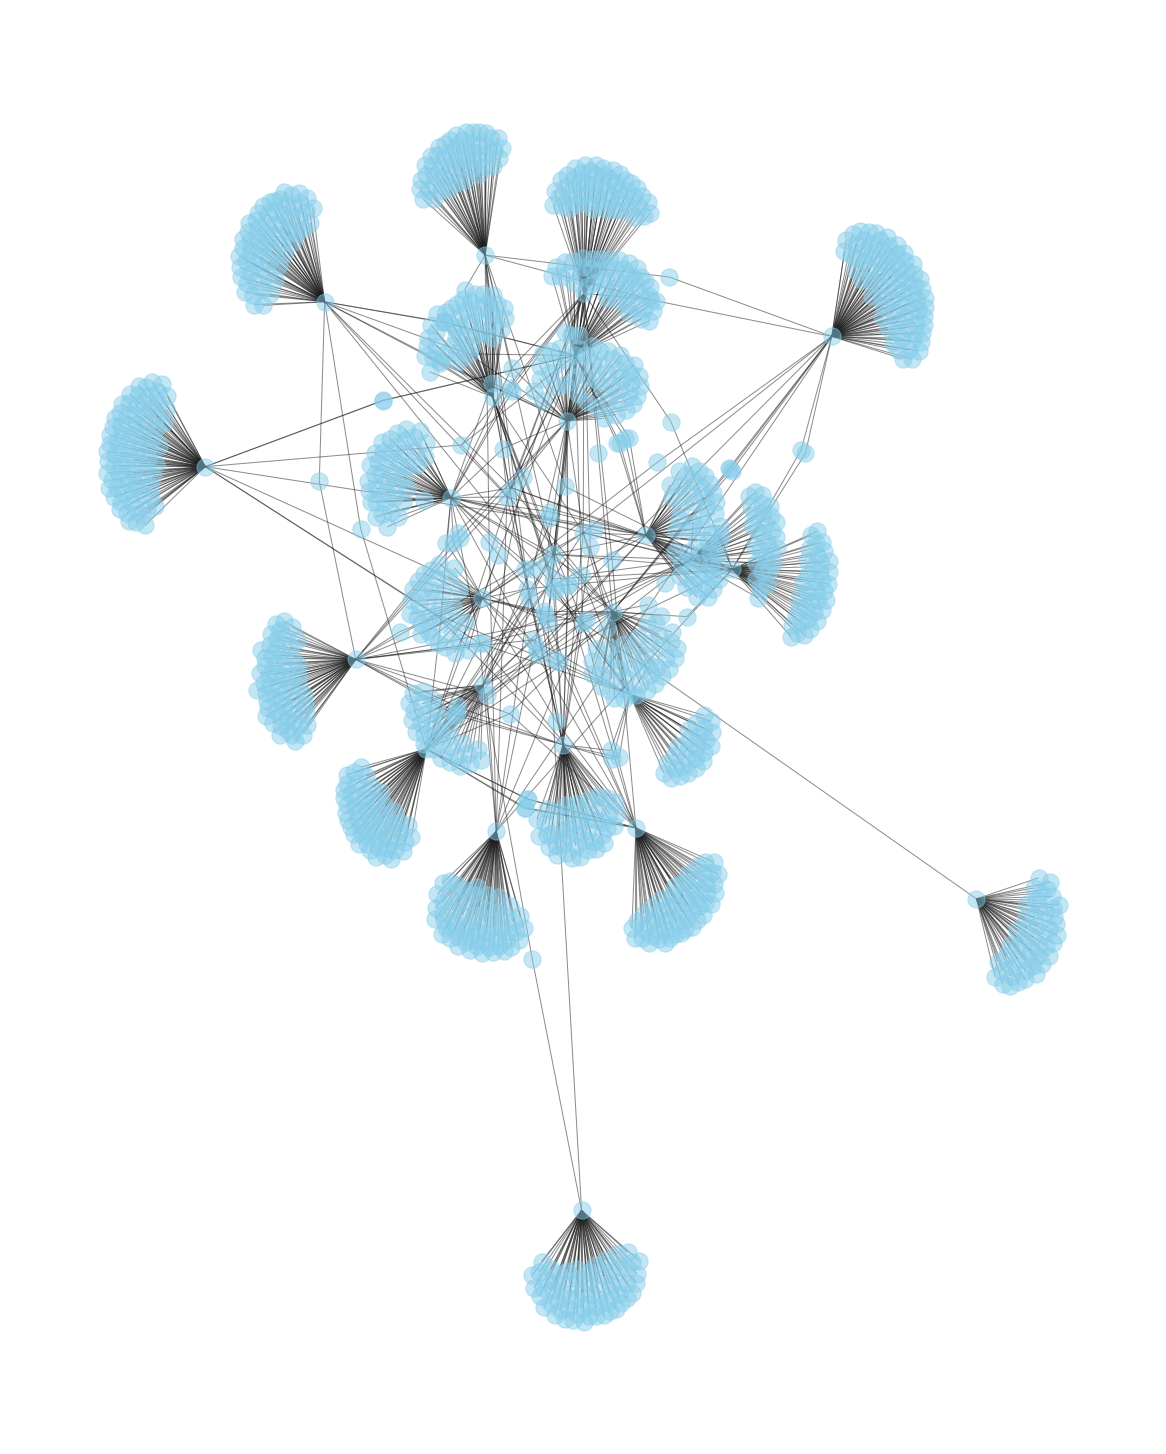

In [22]:
plt.figure(3,figsize=(16,20))
nx.draw(g, with_labels = False, node_color = 'skyblue',
       node_shape = 'o', alpha = 0.5)
plt.show()

Now that thewe've plotted the graph, we can look more into the interactions between users and departments.

In [23]:
cc = g.subgraph(max(nx.connected_components(g), key=len))

The spring layout seems to be the easiest to visualise, so we will use this layout.

In [24]:
pos = nx.spring_layout(cc)

Before we draw a graph that explains the interactions between users and departments, we need to look at the betweeness and closeness centralities. The betweeness centrality scores tell us which users mention other users the most, and the closeness centrality tells us how close each node is to other nodes in the network. Let's explore these two factors now.

In [25]:
between = nx.betweenness_centrality(cc)
pd.Series(between).sort_values(ascending = False).head(22)

601000227                                  0.200886
768457181846962176                         0.157788
21643972                                   0.142842
International Relations                    0.127497
Health Policy                              0.126033
21861323                                   0.120015
Finance                                    0.106783
International Development                  0.104678
Social Policy                              0.103429
Media and Communications                   0.102689
Sociology                                  0.102508
Management                                 0.099988
Psychological and Behavioural Science      0.098515
LSE Law School                             0.098474
Gender Studies                             0.090575
Government                                 0.090218
Geography and Evironment                   0.088048
Economic History                           0.087013
2438234042                                 0.086639
Anthropology

In this simplified list, most departments are the accounts that bridge networks.

In [26]:
close = nx.closeness_centrality(cc)
pd.Series(close).sort_values(ascending = False).head(22)

21861323                     0.353855
21643972                     0.351867
601000227                    0.348928
Finance                      0.348734
Management                   0.347959
Social Policy                0.347380
Government                   0.346228
International Development    0.339843
Sociology                    0.339474
768457181846962176           0.339291
2438234042                   0.337827
Geography and Evironment     0.335296
Methodology                  0.334937
International Relations      0.331044
Gender Studies               0.327925
LSE Law School               0.327582
Economic History             0.327069
Accounting                   0.322523
Statistics                   0.322191
Mathematics                  0.319561
Economics                    0.318586
3224176660                   0.312235
dtype: float64

Based on this list, most departments connect to most users and other departments. Let's visualise the closeness centrality because the closeness of the nodes can reveal information about interactions of the departments within Twitter.

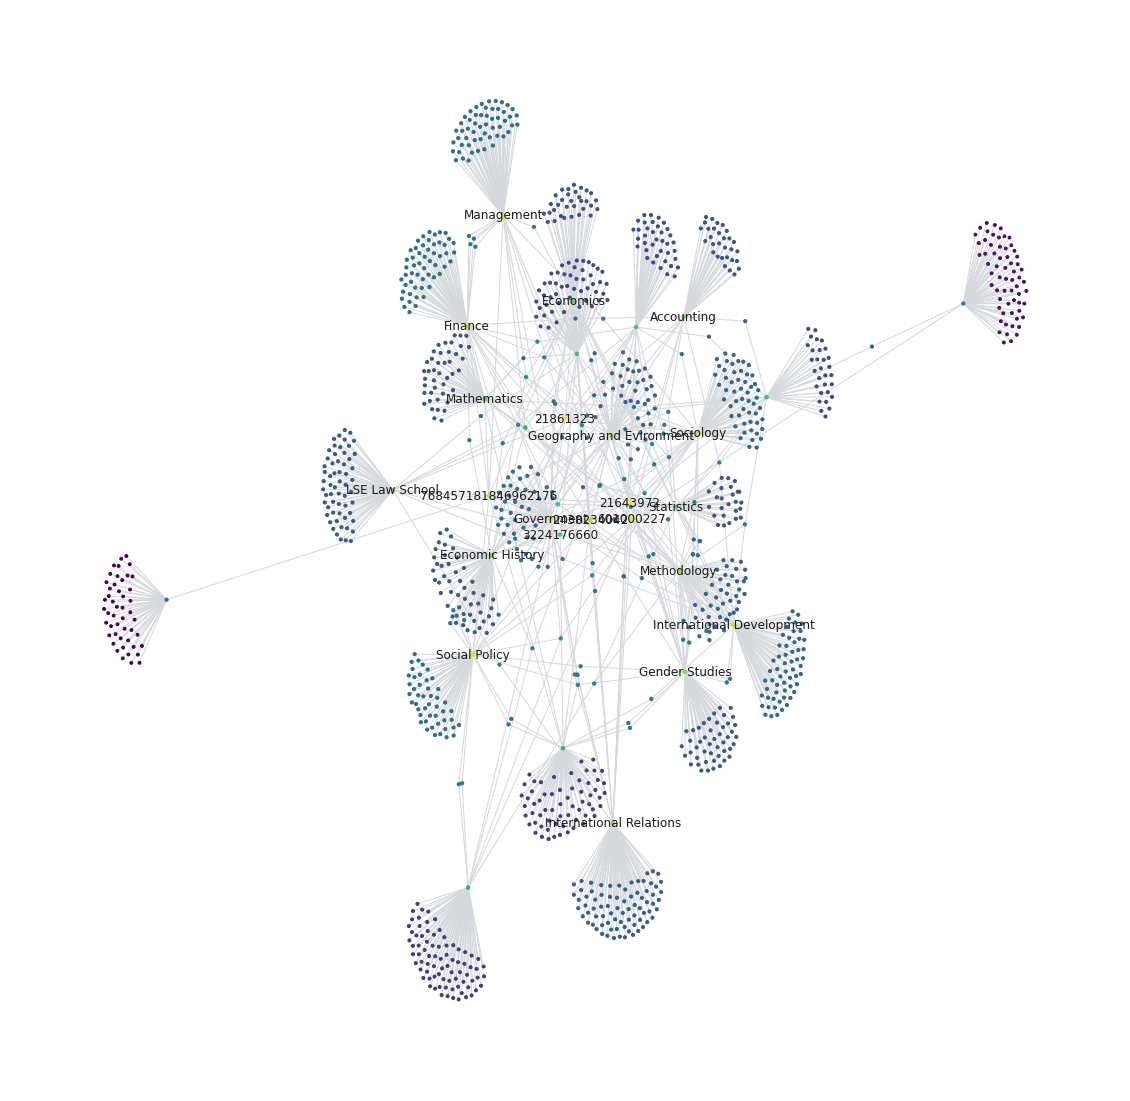

In [27]:
import numpy as np

nsize = np.array([v for v in close.values()])
cutoff = sorted(nsize, reverse=True)[22]
labels = {n: (n if v > cutoff else '') for n, v in close.items()}

fig, ax = plt.subplots(figsize=(20,20))
nx.draw(cc, pos = pos, node_color = nsize, with_labels = True, labels = labels, edge_color = '#D5D8DC', node_size = nsize * 40)

From the graph created above, these are a few features I have noticed:
1. Department accounts have specialised audiences 
2. Departments on Twitter are close to each other


For the first observation, the graph shows that many users only mention one department account instead of many. This pattern could explain the types of audience for each account. It is likely that only students from that particular department only interact with their department. 

In the second observation, the closeness centrality network and scores tells us that most departments are close to each other. It could indicate that most of the mentions on each Twitter account are from other departments. 

To conclude this section, departments on Twitter don't have too many mentions from individual from other departments. However, by observing the mentions that the departments received, we can also say that most departments have a niche audience. It is highly likely that the niche audience compromises of professors, teachers and students of that particular department. Building on this observation, if departments wanted to build a large following on Twitter, they could look into either concentrating on their niche, or try appealing to a wide range of audiences.

### Part 4: Conclusion

To conclude this entire project, we have to circle back to the questions we wanted to answer in the introduction. To decide whether Twitter is an effective social media platform, we need to find out how successful the LSE departments on Twitter are. A successful Twitter account includes several factors. An outstanding account will have high engagement ratios concerning its target audience. Typically, accounts can become successful by creating a variety of content that is catered to their audience.

The following question we have to answer is whether Twitter has an active audience that's worth maintaining. Based on the network graphs in the previous section, most departments have a niche audience. A niche audience could be an advantage or disadvantage. An advantage of a niche audience is that it is easier to build a loyal community from these groups of individuals. A downside is that it is hard to expand out of this niche audience. We can relate this back to our definition of a successful Twitter account and the data analysis. Based on the engagement ratios, the smaller departments had higher engagement rates compared to larger departments. Therefore, we can tell that building a strong community is beneficial to be successful on Twitter.

From the data analysis, growing as an account on Twitter seems doable. Tweets are shared often on Twitter. For instance, we found that the retweet count is the highest form of engagement for all department's accounts. Furthermore, when we explored the connections between the users who mention each department, we found that most departments interacted with each other. Therefore, if a department wants to consider using Twitter, interacting with other departments helps grow their accounts. It tells us that it should be easy to get shares on Twitter. However, it is worth noting that the more interactive forms of engagements like replies and quotes is low.

The last thing we can look at is whether Twitter accounts need to necessarily receive positive or negative attention to grow. We found that most departments with high engagement ratios typically had a high level of positive and neutral mentions. Again, we should expect this. Accounts with less negative attention tend to have better engagement ratios. One extra point to note is that the polarity scores determined the sentiment classifications. Classifications can be affect based on subjectivity, therefore, the positive scores could be overstated, and this observation may not be accurate. It makes it quite hard to determine what kind of responses departments should get from their audience. 

As a whole, Twitter seems like a social media platform that is lacking in many areas. However, before we decide on a recommendation, we should look at the limitations. The analysis only included the last 100 tweets. A more in-depth analysis would include tweets dating back to the start of each department's account. The next downside is that I couldn't perform data analysis on other social media platforms like Facebook and Instagram. Using three platforms to analyse would give a better comparison. Lastly, we only compared LSE departments to each other in the analysis. If we carried out the analysis comparing LSE departments to other university's departments, we could perhaps find that LSE's accounts performed far better than other universities. 

If we were making a conclusion using this analysis alone, Twitter isn't a very effective social media platform. I have made this conclusion because despite the high retweet count on Twitter, it's hard to garner a large and loyal audience. Apart from the difficulty in growing, it's also hard to determine what kind of content would make a department's account successful. 

### Part 5: References

1. Carol Feigenbaum, What is Social Media Analytics [Online] - Available at: https://netbasequid.com/blog/what-is-social-media-analytics-why-is-it-important/ [Accessed 13 April 2022]
2. Euge Inzaugarat, Visualising Twitter interactions[Online] - Available at: https://medium.com/future-vision/visualizing-twitter-interactions-with-networkx-a391da239af5 [Accessed 10 April 2022]
3. Sloria, TextBlob for sentiment classification [Online] - Available at: https://textblob.readthedocs.io/en/dev/ [Accessed 1 April 2022]

[The code was last run on 25th April 2022]